In [305]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [306]:
df = pd.read_csv('archive/trumptweets.csv')
df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [307]:
# 'date' 열의 결측값 확인
df['date'].isnull().sum()

0

In [308]:
# 년-월로 변경
day = df['date'].str.split(' ', expand=True)[0].str[:7]
df['date'] = day
df['date']

0        2009-05
1        2009-05
2        2009-05
3        2009-05
4        2009-05
          ...   
41117    2020-01
41118    2020-01
41119    2020-01
41120    2020-01
41121    2020-01
Name: date, Length: 41122, dtype: object

<AxesSubplot: >

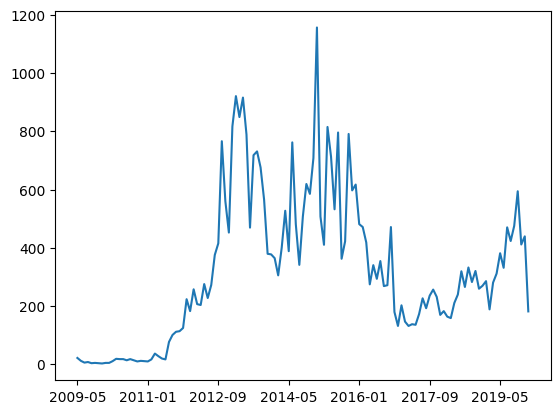

In [309]:
# 년월별 트윗 수 확인 
df['date'].value_counts(sort=False).plot()

In [310]:
# retweets 결측값 확인
df['retweets'].isna().sum()

0

In [311]:
date_retweets = df.groupby('date').agg(sum_retweets = ('retweets', 'sum'))
date_retweets

,sum_retweets
date,
2009-05,2430
2009-06,298
2009-07,84
2009-08,386
2009-09,143
...,...
2019-09,7595919
2019-10,11079653
2019-11,7331334


<AxesSubplot: xlabel='date'>

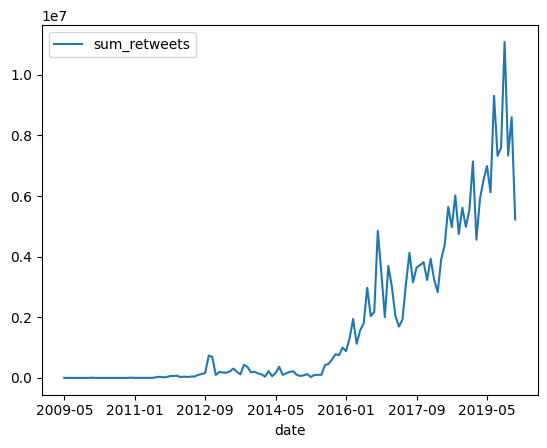

In [312]:
date_retweets.plot()

In [313]:
# favorites 결측값 확인
df['favorites'].isna().sum()

0

In [328]:
word = df.loc[df['favorites'].nlargest(10).index, 'content']
word

38625    a ap rocky released from prison and on his way...
40959                           pic twitter com vxekivzptf
40990    all is well  missiles launched from iran at tw...
40868                                     merry christmas 
38394    just spoke to   kanyewest about his friend a a...
40493                           pic twitter com 11nzkwoctu
40976    the united states just spent two trillion doll...
40948                                      happy new year 
30904    such a beautiful and important evening  the fo...
40036    we have declassified a picture of the wonderfu...
Name: content, dtype: object

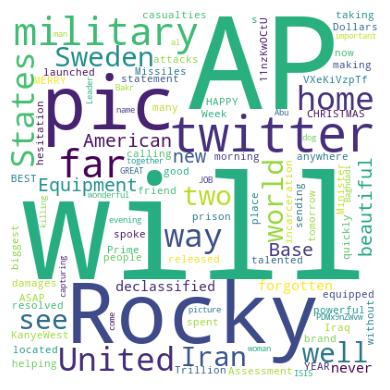

In [315]:
words = Counter(word)
string_data = ''
for word in words:
	string_data +=' '+word
wordcloud = WordCloud(width = 400, height = 400, background_color='white').generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [316]:
date_favorites = df.groupby('date').agg(sum_favorites = ('favorites', 'sum'))
date_favorites

,sum_favorites
date,
2009-05,3813
2009-06,498
2009-07,99
2009-08,478
2009-09,174
...,...
2019-09,32579849
2019-10,44545256
2019-11,30083769


<AxesSubplot: xlabel='date'>

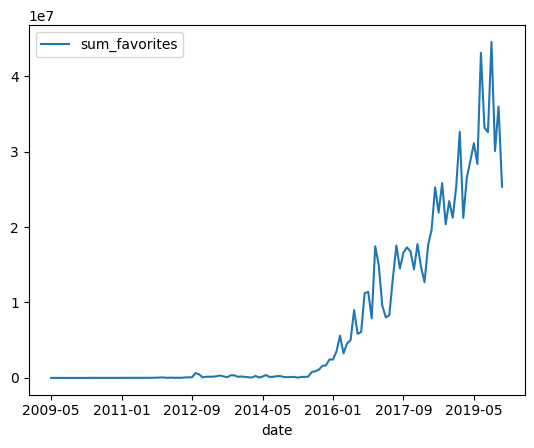

In [317]:
date_favorites.plot()

In [318]:
# mentions열의 결측값 확인
df['mentions'].isnull().sum()

18655

In [319]:
# mentions열의 결측값 제거
mention = df['mentions'].dropna()
mention

39           @
41        @9pm
42        @9pm
59       @TNGC
64        @Mar
         ...  
41107        @
41113      @ @
41114      @ @
41120    @ @ @
41121        @
Name: mentions, Length: 22467, dtype: object

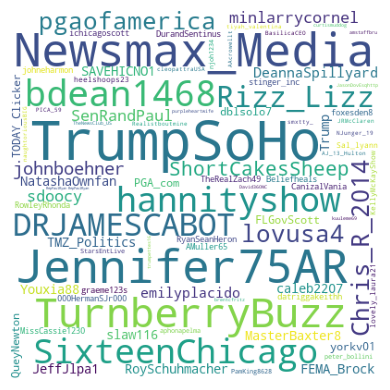

In [320]:
words = Counter(mention)
string_data = ''
for word in words:
	string_data +=' '+word
wordcloud = WordCloud(width = 400, height = 400, background_color='white').generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [321]:
# mentions열의 결측값 확인
df['hashtags'].isnull().sum()

35312

In [322]:
# mentions열의 결측값 제거
hashtag = df['hashtags'].dropna()
hashtag.value_counts()

#                 4152
# #               1058
# # #              208
#1                 113
# # # #             36
                  ... 
#ixzz3J3cUHFwI       1
#ixzz3IHQHR1Wf       1
#ixzz3IHR8pjc1       1
#t #                 1
# #2020              1
Name: hashtags, Length: 141, dtype: int64

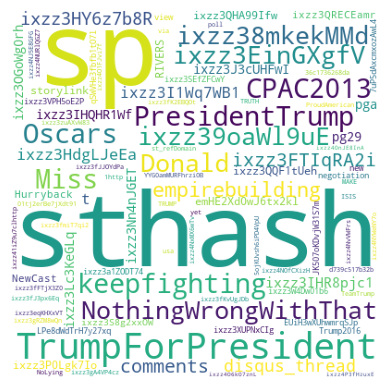

In [323]:
words = Counter(hashtag)
string_data = ''
for word in words:
	string_data +=' '+word
wordcloud = WordCloud(width = 400, height = 400, background_color='white').generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [324]:
# content열의 결측값 확인
df['content'].isnull().sum()

0

In [325]:
# 문자열에서 특수문자제거
df["content"] = df["content"].str.replace(pat=r'[^\w]', repl=' ', regex=True)

In [326]:
# 소문자로 변경
df["content"] = df["content"].str.lower()

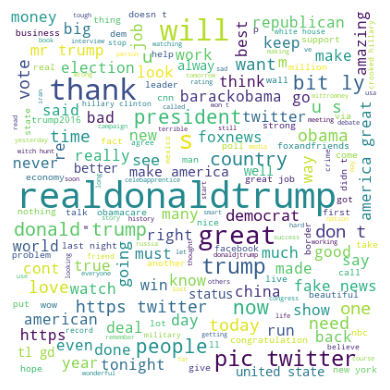

In [327]:
# WordCloud 생성
words = Counter(df['content'])
string_data = ''
for word in words:
	string_data = string_data+' '+word
wordcloud = WordCloud(width = 400, height = 400, background_color='white').generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()